In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager,rc
import re

matplotlib.rc('font', family = 'Malgun Gothic')

## 데이터 불러오기

- 사용일자 : 카드 사용 일자
- 지역 : 카드 사용 지역 (종로구 / 노원구)
- 소비처 : 카드 사용 소비처(동 단위)
- 주소 : 카드 사용 세부 주소
- 소비처업종 : 소비처업종
- 성별 : 카드사용 소비자 성별 (여성 / 남성)
- 연령 : 카드사용 소비자 연령 (연속형)
- 사용횟수 : 카드사용횟수
- 사용금액 : 카드사용금액 
- 사용카드 : 사용카드 ID

In [2]:
Card_spending=pd.read_csv("./000_Card_Spanding.csv")
Card_spending.head()

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드
0,20180401,종로구,상계2동,종로구 상계2동,자동차정비,여성,42,3,56,82
1,20180401,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61
2,20180401,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140
3,20180401,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104
4,20180401,종로구,중계4동,종로구 중계4동,음료식품,여성,38,2,57,103


In [3]:
Card_spending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187522 entries, 0 to 187521
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   사용일자    187522 non-null  int64 
 1   지역      187522 non-null  object
 2   소비처     187522 non-null  object
 3   주소      187522 non-null  object
 4   소비처업종   187522 non-null  object
 5   성별      187522 non-null  object
 6   연령      187522 non-null  int64 
 7   사용횟수    187522 non-null  int64 
 8   사용금액    187522 non-null  int64 
 9   사용카드    187522 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 14.3+ MB


- 명목형 : 지역, 소비처, 주소, 소비처업종, 성별 (5개)  
- 수치형 : 사용일자, 연령, 사용횟수, 사용금액, 사용카드 (5개)

## 요약통계량

In [4]:
Card_spending.describe()

,사용일자,연령,사용횟수,사용금액,사용카드
count,1.875220e+05,187522.000000,187522.000000,1.875220e+05,187522.000000
mean,2.018243e+07,45.271339,82.389949,1.702427e+03,140.570280
std,3.535721e+03,16.042389,287.401575,1.093201e+04,72.357502
min,2.018040e+07,20.000000,-1.000000,2.000000e+00,0.000000
25%,2.018062e+07,32.000000,9.000000,9.000000e+01,94.000000
50%,2.018091e+07,45.000000,24.000000,1.530000e+02,158.000000
75%,2.018121e+07,56.000000,53.000000,6.820000e+02,206.000000
max,2.019023e+07,105.000000,20082.000000,2.210348e+06,263.000000


## 결측치 확인

In [5]:
Card_spending.isnull().sum()

사용일자     0
지역       0
소비처      0
주소       0
소비처업종    0
성별       0
연령       0
사용횟수     0
사용금액     0
사용카드     0
dtype: int64

> 결측치 없음

## 데이터 빈도 확인

In [6]:
for i in Card_spending.columns:
    display(pd.DataFrame(Card_spending[i].value_counts()))
    print("["+i+"]")

,사용일자
20180507,676
20181110,660
20181013,648
20181012,647
20190119,645
...,...
20190101,438
20180923,428
20180708,406
20180924,354


[사용일자]


,지역
노원구,102634
종로구,84888


[지역]


,소비처
"종로5,6가동",14280
상계2동,14226
평창동,10918
공릉2동,10388
"종로1,2,3,4가동",10328
상계5동,10274
상계9동,8797
교남동,8217
공릉1동,7559
상계8동,7433


[소비처]


,주소
"종로구 종로1,2,3,4가동",8217
노원구 상계2동,7996
"노원구 종로5,6가동",7785
"종로구 종로5,6가동",6495
노원구 공릉1동,6267
종로구 상계2동,6230
노원구 공릉2동,6075
노원구 평창동,5968
종로구 혜화동,5747
"노원구 상계6,7동",5448


[주소]


,소비처업종
유통업,24512
요식업소,24183
음료식품,23060
의료기관,21039
보건위생,18007
서적문구,12806
의복,9796
자동차정비,8450
레저업소,8249
문화취미,8102


[소비처업종]


,성별
여성,94934
남성,92588


[성별]


,연령
45,13987
50,13316
40,13074
35,12835
25,12645
...,...
95,81
97,3
102,1
104,1


[연령]


,사용횟수
4,23446
9,13501
13,8044
5,5777
3,5423
...,...
2111,1
1853,1
1725,1
3772,1


[사용횟수]


,사용금액
56,2371
57,2358
55,2236
54,1842
58,1746
...,...
10301,1
12350,1
65688,1
10429,1


[사용금액]


,사용카드
217,3636
216,3595
215,3328
218,3222
158,2952
...,...
65,91
66,87
68,85
70,75


[사용카드]


## 파생 변수 생성

- 1회 사용금액 파생 변수 생성

In [7]:
Card_spending['1회 사용금액'] = round(Card_spending['사용금액'] / Card_spending['사용횟수'])

- 연령대 파생 변수 생성

In [8]:
Card_spending['연령대'] = Card_spending["연령"].apply(lambda x : str((x//10)*10)+"대")

- 요일 파생 변수 생성

In [9]:
import datetime

date = []

for t in Card_spending['사용일자']:
    date.append(datetime.datetime.strptime(str(t), '%Y%m%d').date())
    
t = ['월', '화', '수', '목', '금', '토', '일']
days = []

for d in date:
    days.append(t[d.weekday()])
    
Card_spending['요일'] = days

## 이상치 처리

- 지역+소비처 = 주소 이상치 처리

In [10]:
JongNo=["교남동", "무악동", "부암동", "사직동", "삼청동", "종로1,2,3,4가동", "종로5,6가동", "창신2동", "창신3동", "청운효자동", "평창동", "혜화동"]
NoWon=["공릉1동", "공릉2동", "상계10동", "상계2동", "상계3,4동", "상계5동", "상계6,7동", "상계8동", "상계9동", "중계1동", "중계2,3동", "중계4동", "중계본동", "하계1동", "하계2동"]

Card_spending["지역"]=Card_spending.apply(lambda x : "종로구" if (x["소비처"] in JongNo) else "노원구", axis=1)
Card_spending["주소"]=Card_spending.apply(lambda x: x["지역"]+" "+x["소비처"], axis=1)

In [11]:
# 주소 이상치 재확인
np.array(sorted(Card_spending['주소'].unique()))

array(['노원구 공릉1동', '노원구 공릉2동', '노원구 상계10동', '노원구 상계2동', '노원구 상계3,4동',
       '노원구 상계5동', '노원구 상계6,7동', '노원구 상계8동', '노원구 상계9동', '노원구 중계1동',
       '노원구 중계2,3동', '노원구 중계4동', '노원구 중계본동', '노원구 하계1동', '노원구 하계2동',
       '종로구 교남동', '종로구 무악동', '종로구 부암동', '종로구 사직동', '종로구 삼청동',
       '종로구 종로1,2,3,4가동', '종로구 종로5,6가동', '종로구 창신2동', '종로구 창신3동',
       '종로구 청운효자동', '종로구 평창동', '종로구 혜화동'], dtype='<U15')

- 사용횟수 이상치 처리

In [12]:
# 사용횟수 이상치 처리
notnull = Card_spending[Card_spending['사용횟수'] > 0]
yesnull = Card_spending[Card_spending['사용횟수'] <= 0]

cnt = []

for i in range(len(yesnull)):
    cnt.append(round(pd.DataFrame(notnull.groupby(['사용금액', '소비처업종']).mean().loc[yesnull.iloc[i]['사용금액']].loc[yesnull.iloc[i]['소비처업종']]).loc['사용횟수'].values[0]))
    
yesnull['사용횟수'] = cnt
Card_spending = pd.concat([notnull, yesnull]).sort_index()

<AxesSubplot:>

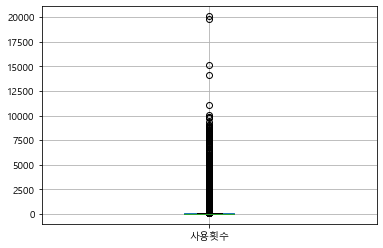

In [13]:
Card_spending[['사용횟수']].boxplot()

array([[<AxesSubplot:title={'center':'사용횟수'}>]], dtype=object)

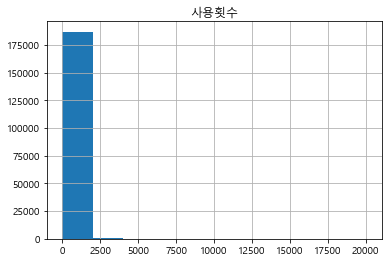

In [14]:
Card_spending[['사용횟수']].hist()

In [15]:
Card_spending = Card_spending[Card_spending[['사용횟수']]['사용횟수'] < 5000].reset_index(drop = True)

> 사용횟수 > 5000 이상치가 사라짐

<AxesSubplot:>

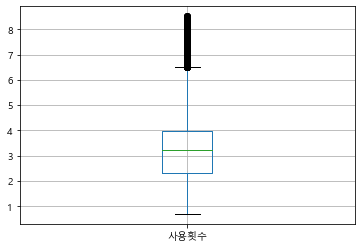

In [16]:
# 사용횟수 이상치 처리 후 boxplot
np.log1p(Card_spending[['사용횟수']]).boxplot()

array([[<AxesSubplot:title={'center':'사용횟수'}>]], dtype=object)

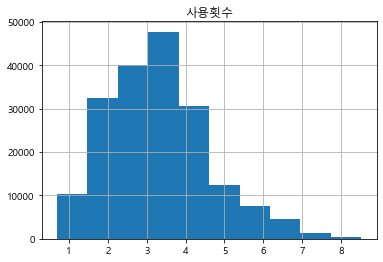

In [17]:
# 사용횟수 이상치 처리 후 Histogram
np.log1p(Card_spending[['사용횟수']]).hist()

- 사용금액 이상치 처리

<AxesSubplot:>

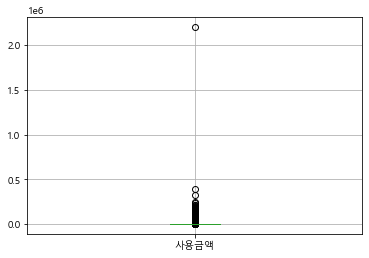

In [18]:
Card_spending[['사용금액']].boxplot()

array([[<AxesSubplot:title={'center':'사용금액'}>]], dtype=object)

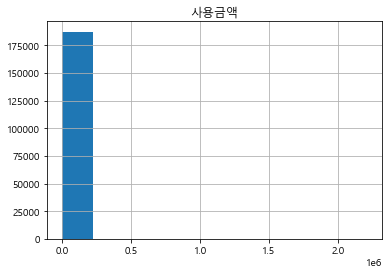

In [19]:
Card_spending[['사용금액']].hist()

In [20]:
Card_spending = Card_spending[Card_spending[['사용금액']]['사용금액'] < 200000].reset_index(drop = True)

> 사용금액 > 200,000 이상치 처리  

<AxesSubplot:>

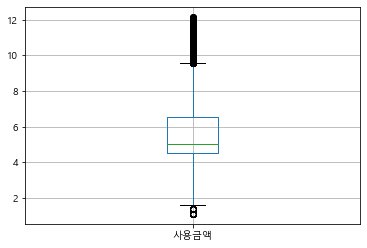

In [21]:
# 사용금액 이상치 처리 후 boxplot
np.log1p(Card_spending[['사용금액']]).boxplot()

array([[<AxesSubplot:title={'center':'사용금액'}>]], dtype=object)

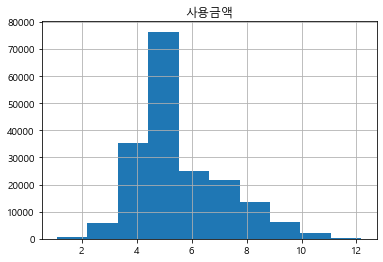

In [22]:
# 사용금액 이상치 처리 후 Histogram
np.log1p(Card_spending[['사용금액']]).hist()

- 1회 사용금액 이상치 처리

<AxesSubplot:>

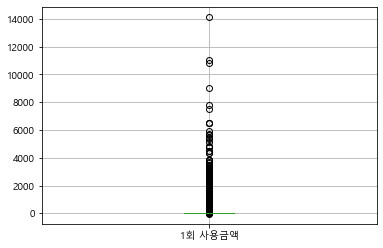

In [23]:
Card_spending[['1회 사용금액']].boxplot()

In [24]:
Card_spending = Card_spending[Card_spending[['1회 사용금액']]['1회 사용금액'] < 4000].reset_index(drop = True)

> 1회 사용금액 > 4000 이상치 처리

<AxesSubplot:>

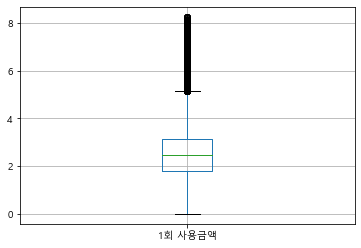

In [25]:
# 1회 사용금액 이상치 처리 후 boxplot
np.log1p(Card_spending[['1회 사용금액']]).boxplot()

In [26]:
Card_spending.head()

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,1회 사용금액,연령대,요일
0,20180401,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,19.0,40대,일
1,20180401,종로구,혜화동,종로구 혜화동,유통업,여성,43,2,50,61,25.0,40대,일
2,20180401,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,50,2,59,140,30.0,50대,일
3,20180401,종로구,"종로5,6가동","종로구 종로5,6가동",레저업소,남성,45,3,56,104,19.0,40대,일
4,20180401,노원구,중계4동,노원구 중계4동,음료식품,여성,38,2,57,103,28.0,30대,일


## 최종 Card_spending 저장

In [27]:
Card_spending.to_csv("Card_spending.csv", encoding="cp949", index=False)